In [1]:
# Loading needed libraries

# 1.  Loading packages needed for Arithmetic computation, Dataframe creation and manipulation,z-score computation
#     and Plotting the statistical plots
# 2.  Importing Logistic regression, Decision Tree and sklearn package's data splitting function
# 3.  Importing all ensemble methods  classifiers
# 4.  Importing random oversampling package
# 5.  Importing all necessary packages to calculate the  performance measures
# 6.  Ignore Warnings
# 7.  Features scaling

# 1. 
import numpy as np      
import pandas as pd  
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

#2. 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier

#3.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#4.
from imblearn.over_sampling import RandomOverSampler

#5.
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix,recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#6.
import warnings
warnings.filterwarnings('ignore')

#7.
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset - Reading datafile as Dataframe called bankdata

bankdata=pd.read_csv("Bank-full.csv")

In [3]:
# Viewing the first 5 rows of dataframe

bankdata.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Inference: unknown value exist in poutcome feature. Similar unknown value may exist in other categorical columns as well. Need to check and treat 

In [4]:
# Dataframe shape - Get the number of rows and columns available in dataframe

bankdata.shape

print("Total number of rows ")
print( bankdata.shape[0])
print("Total number of Columns ")
print( bankdata.shape[1])

Total number of rows 
45211
Total number of Columns 
17


In [5]:
# Get the column names, number of non-null values and data-type for each column

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We see that many variables are of type object and we change them to categorical for further analysis

In [6]:
# Checking for null value

bankdata.isnull().sum()

# Inference: No Null value exist

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
# Checking for Duplicate Values

bankdata.duplicated().sum()

#Inference: No duplicates

0

In [8]:
# Dataframe statistical summary 

bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Observations:
1. From 5 point summary, it is clear that balance, duration, campaign, pdays and previous have outliers/skewed distribution
2. Minimum of duration is zero(call duration), which is not logical. Need to check on this

In [9]:
# identifying the number of rows with duration =0

bankdata[bankdata['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [10]:
# Replacing the duration = median(180 seconds) for rows with duration=0

bankdata['duration']=bankdata['duration'].replace('0','180')

In [11]:
# Number of unique value in each column

print("Number of unique value in each column")
bankdata.apply(lambda x: (x.nunique()))

Number of unique value in each column


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [12]:
# Converting all object columns to Categorical columns

for col in bankdata.columns:
    if bankdata[col].dtype=='object':
        bankdata[col]= pd.Categorical(bankdata[col])

In [13]:
bankdata.info()

# Inference: All object data type columns are changed to Category data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


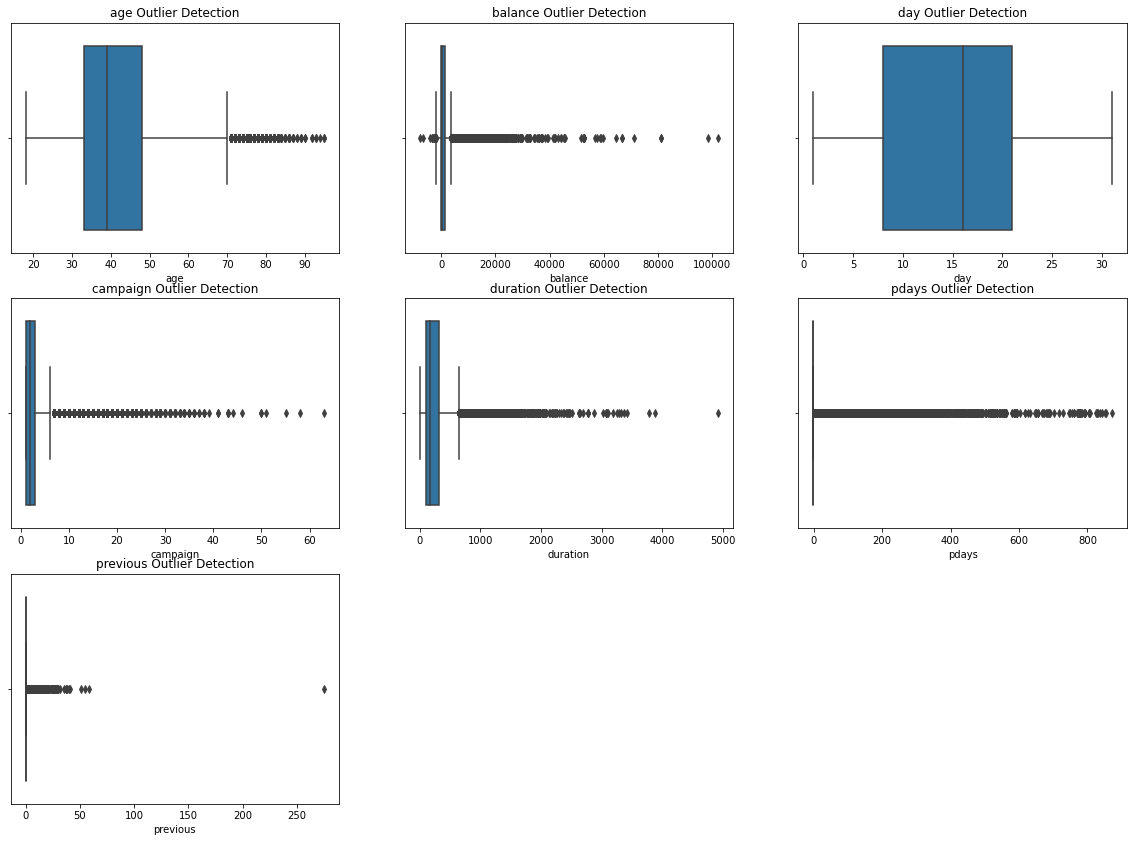

In [14]:
# Plotting the Box plot to identify the outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in bankdata[['age','balance','day','campaign','duration','pdays','previous']]:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(bankdata[continuous_feature])
    plt.xlabel(continuous_feature)
    plt.title(continuous_feature+' Outlier Detection')
    plotnumber+=1
plt.show()

Inference:Features- age,duration, balance, campaign, pdays and previous have outliers.Lets treat the outlier using z-score
    

In [15]:
# Removing outlier using z-score

z = np.abs(stats.zscore(bankdata[['age','balance','duration','campaign','pdays','previous']]))
print(z)
bankdata=bankdata[(z<3).all(axis=1)]
bankdata.shape

# Inference: there is change in shape of dataframe after outlier treatment

[[1.60696496 0.25641925 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.28852927 0.43789469 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.74738448 0.44676247 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [2.92540065 1.42959305 3.37379688 0.72181052 1.43618859 1.05047333]
 [1.51279098 0.22802402 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.37068857 0.52836436 0.39932797 0.24656035 1.4761376  4.52357654]]


(40209, 17)

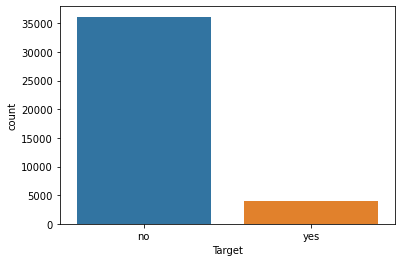

In [16]:
sns.countplot(x='Target',data=bankdata)

#Inference: Target variable is highly imbalanced

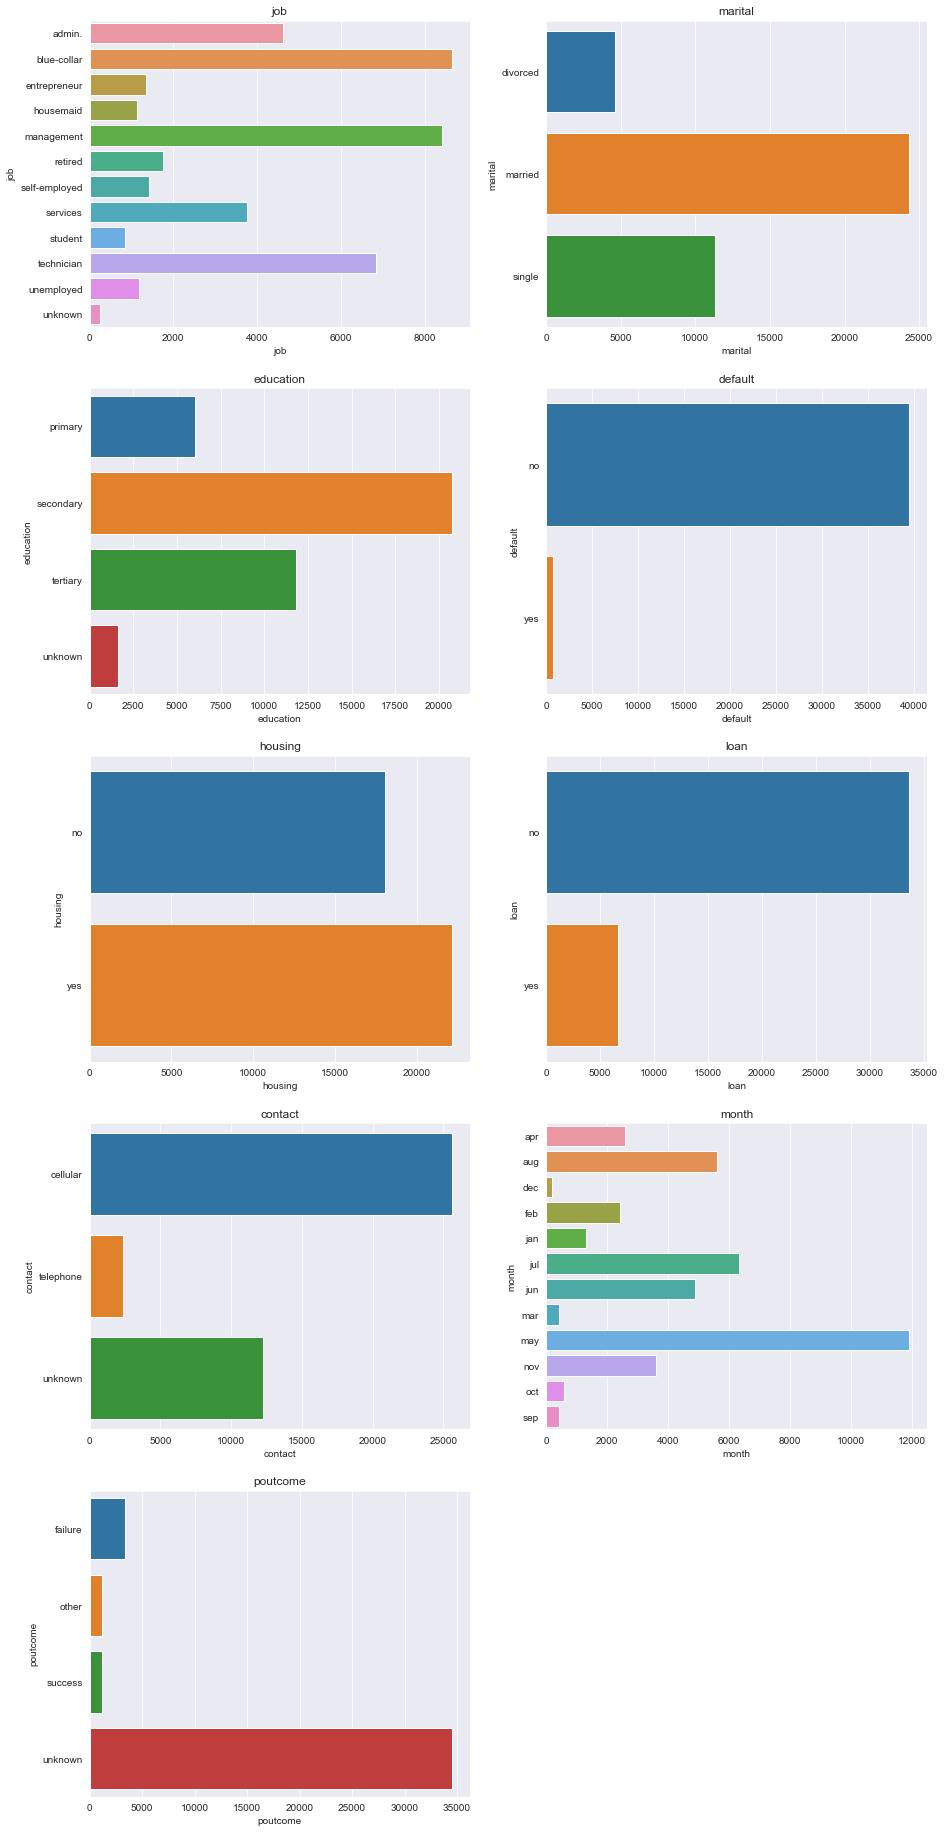

In [17]:
# Categorical Feature Distribution

sns.set_style("darkgrid")
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in ['job','marital','education','default','housing','loan','contact','month','poutcome']:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=bankdata)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Inference: 
1. we have unknown category in 4 features - job, education, contact, poutcome. Needs to be treated/dropped. 

2. poutcome: Majority of  data falls into unknown class. Important classes under this variable: Success, Failure have lesser number of distribution.This may not be considered as good candidate for final prediction model. we can drop this column

3. eductaion: Replace the unkown category with its mode.

4. default: There is a very small number of respondents who defaulted on a credit, so this variable doesn’t look very useful for prediction purposes and can be dropped from final model.

5. contact: Majority of  data falls into unknown class.This may not be considered as good candidate for final prediction model

6. Majority of customers are married.

#### Value counts of all categorical columns

In [18]:
# Target Variable - Target
# Using value_counts() function to get the total number of customers under each category

bankdata['Target'].value_counts()/len(bankdata)*100

no     89.91768
yes    10.08232
Name: Target, dtype: float64

In [19]:
# Column - Education
# Using value_counts() function to get the total number of customers under each category

bankdata['education'].value_counts()/len(bankdata)*100

secondary    51.582979
tertiary     29.354125
primary      15.014052
unknown       4.048845
Name: education, dtype: float64

In [20]:
# replacing the unknown rows in education with its mode

bankdata['education']=bankdata['education'].replace('unknown','secondary')
bankdata.education.value_counts()/len(bankdata)*100

secondary    55.631824
tertiary     29.354125
primary      15.014052
Name: education, dtype: float64

In [21]:
# Column - marital
# Using value_counts() function to get the total number of customers under each category

bankdata['marital'].value_counts()/len(bankdata)*100

married     60.409361
single      28.155388
divorced    11.435251
Name: marital, dtype: float64

In [22]:
# Column - default
# Using value_counts() function to get the total number of customers under each category

bankdata['default'].value_counts()/len(bankdata)*100

no     98.127285
yes     1.872715
Name: default, dtype: float64

There is a very small number of respondents who defaulted on a credit, so this variable doesn’t look very useful for prediction purposes and can be dropped from the dataset

In [23]:
# Column - Loan
# Using value_counts() function to get the total number of customers under each category

bankdata['loan'].value_counts()/len(bankdata)*100

no     83.526076
yes    16.473924
Name: loan, dtype: float64

Most of the respondents don’t have a personal loan

In [24]:
# Column - contact
# Using value_counts() function to get the total number of customers under each category

bankdata['contact'].value_counts()/len(bankdata)*100

cellular     63.689721
unknown      30.510582
telephone     5.799697
Name: contact, dtype: float64

Observation: Nearly 30% of data is unknown in contact column. Need to check how it relates with dependent variable. we can drop if there is no relationship. Need to check on this

In [25]:
# Column - month
# Using value_counts() function to get the total number of customers under each category

bankdata['month'].value_counts()/len(bankdata)*100

may    29.558059
jul    15.697978
aug    13.947126
jun    12.129125
nov     8.988038
apr     6.411500
feb     6.030988
jan     3.248029
oct     1.452411
sep     1.074386
mar     1.024646
dec     0.437713
Name: month, dtype: float64

In [26]:
# Column - housing
# Using value_counts() function to get the total number of customers under each category

bankdata['housing'].value_counts()/len(bankdata)*100

yes    55.119501
no     44.880499
Name: housing, dtype: float64

In [27]:
# Column - job
# Using value_counts() function to get the total number of customers under each category

bankdata['job'].value_counts()/len(bankdata)*100

blue-collar      21.530006
management       20.913228
technician       17.035987
admin.           11.477530
services          9.328757
retired           4.379617
self-employed     3.494243
entrepreneur      3.359944
unemployed        2.952075
housemaid         2.800368
student           2.086598
unknown           0.641647
Name: job, dtype: float64

In [28]:
# dropping unknown category from job since % of unknown category is less than 1. Treating this unknown value will not be helpful


bankdata=bankdata.drop(bankdata[bankdata.job == 'unknown'].index, axis=0,inplace=False)
bankdata.job.unique()

[management, technician, entrepreneur, blue-collar, retired, ..., services, self-employed, unemployed, housemaid, student]
Length: 11
Categories (11, object): [management, technician, entrepreneur, blue-collar, ..., self-employed, unemployed, housemaid, student]

In [29]:
bankdata.shape

(39951, 17)

In [30]:
# Column - poutcome
# Using value_counts() function to get the total number of customers under each category

bankdata['poutcome'].value_counts()/len(bankdata)*100

unknown    85.832645
failure     8.325198
success     2.941103
other       2.901054
Name: poutcome, dtype: float64

In [31]:
# 86% of data is unknown category. we can drop this

Target               no       yes
job                              
admin.         0.894041  0.105959
blue-collar    0.936814  0.063186
entrepreneur   0.930422  0.069578
housemaid      0.923623  0.076377
management     0.879653  0.120347
retired        0.825099  0.174901
self-employed  0.898932  0.101068
services       0.925886  0.074114
student        0.715137  0.284863
technician     0.902628  0.097372
unemployed     0.860994  0.139006 
------------------------------------------------------

Target          no       yes
marital                     
divorced  0.902444  0.097556
married   0.914106  0.085894
single    0.865962  0.134038 
------------------------------------------------------

Target           no       yes
education                    
primary    0.935371  0.064629
secondary  0.907678  0.092322
tertiary   0.864814  0.135186 
------------------------------------------------------

Target         no       yes
housing                    
no       0.850654  0.149346
yes     

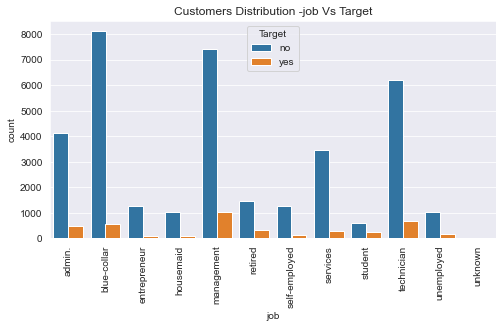

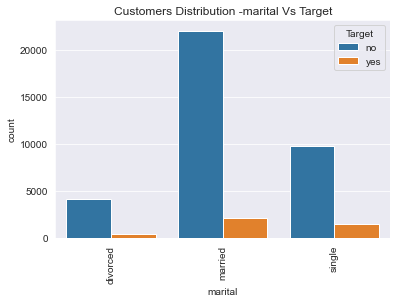

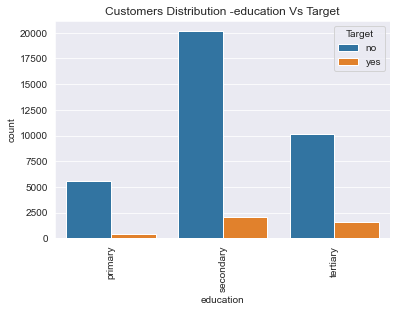

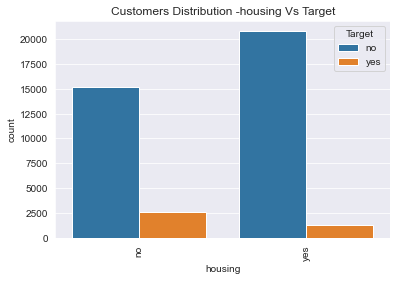

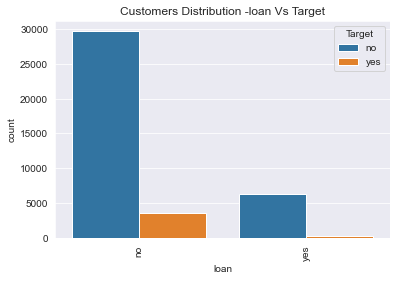

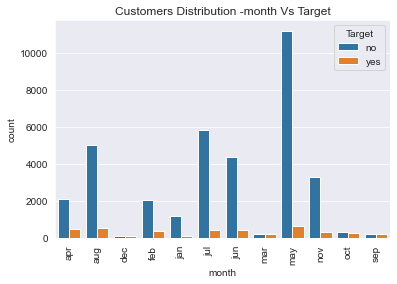

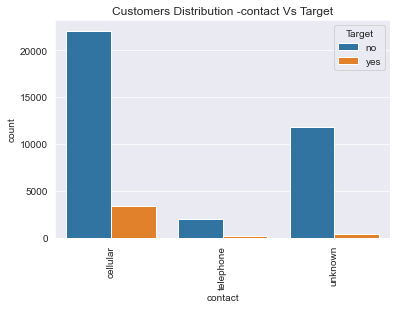

<Figure size 432x288 with 0 Axes>

In [32]:
# impact of categorical columns on Target variable

plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
for i in bankdata[['job','marital','education','housing','loan','month','contact']]:
    plt.title('Customers Distribution -'+i+' Vs Target')
    a=pd.crosstab(bankdata[i],bankdata['Target'],normalize='index')
    print(a,'\n------------------------------------------------------\n')
    ax=sns.countplot(bankdata[i],hue=bankdata['Target'])
    plt.figure()
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


In [33]:
# Dropping the categorical columns -  marital,default, contact and poutcome since it is not having any significant relationship with Target

bankdata.drop(['marital','contact','default','poutcome'],axis=1, inplace=True)
bankdata.head()

,age,job,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,tertiary,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,secondary,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,secondary,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,secondary,1506,yes,no,5,may,92,1,-1,0,no
5,35,management,tertiary,231,yes,no,5,may,139,1,-1,0,no


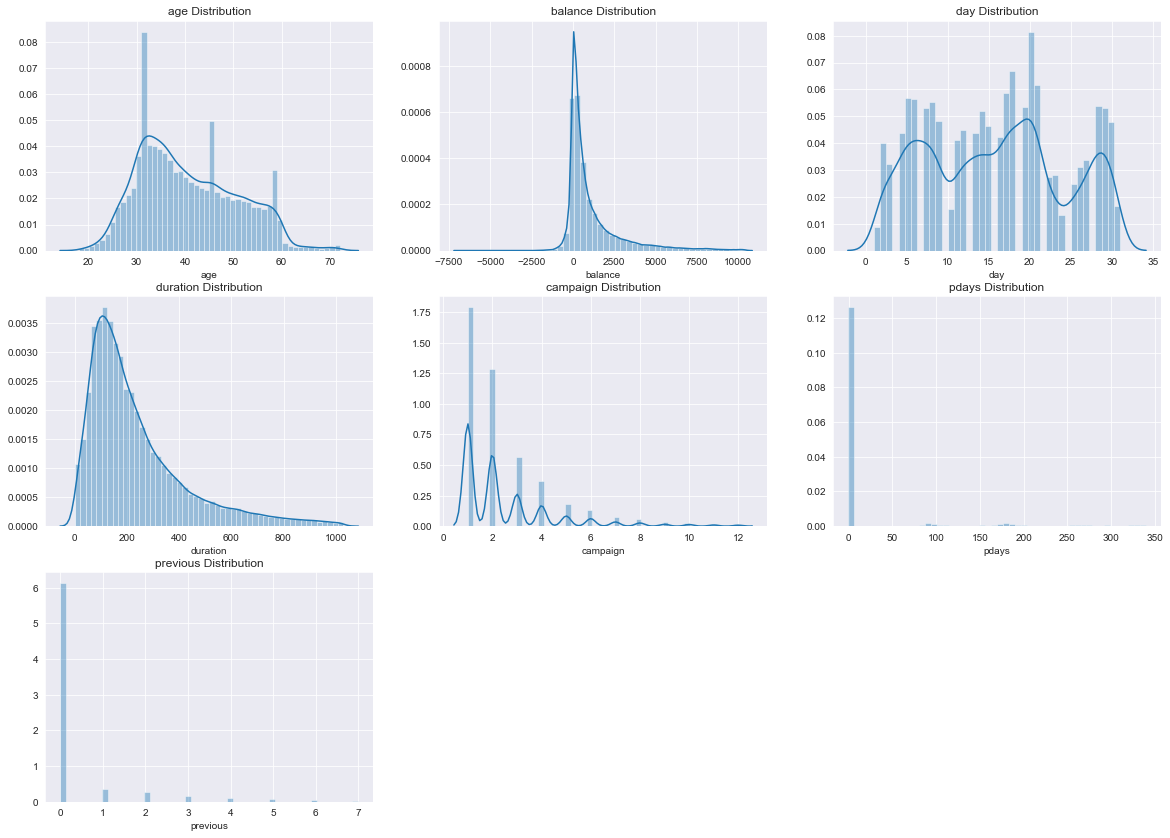

In [34]:
#Numerical columns

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for i in ['age','balance','day','duration','campaign','pdays','previous']:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(bankdata[i])
    plt.xlabel(i)
    plt.title(i+' Distribution')
    plotnumber+=1
plt.show()

In [35]:
# Converting the  data type of dependent variable from category to int

bankdata['Target']=bankdata['Target'].replace(["yes","no"],["1","0"])
bankdata['Target']=bankdata['Target'].astype('int')
bankdata.Target.dtype

dtype('int64')

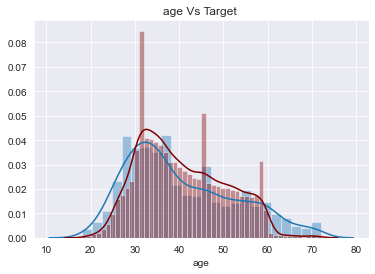

In [36]:
# Dist Plot for age attribute and its impact on Target variable 

plt.title ('age Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['age'])
sns.distplot( bankdata[bankdata['Target'] == 0]['age'],color='Maroon')
plt.show()

Customers with Age Range - 20 to 60 have significant relationship with Target

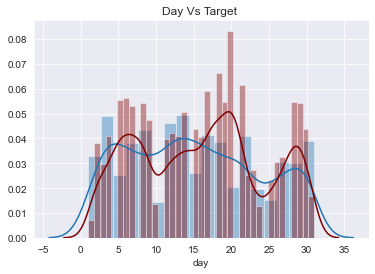

In [37]:
# Dist Plot for day attribute and its impact on Target variable 

plt.title ('Day Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['day'])
sns.distplot( bankdata[bankdata['Target'] == 0]['day'],color='Maroon')
plt.show()

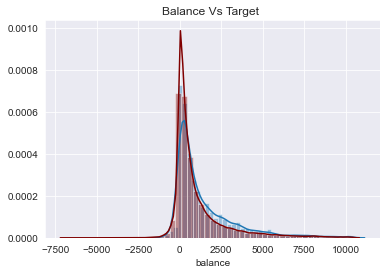

In [38]:
# Dist Plot for Balance attribute and its impact on Target variable 

plt.title ('Balance Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['balance'])
sns.distplot( bankdata[bankdata['Target'] == 0]['balance'],color='Maroon')
plt.show()

Customers whose balance range from -2500 to 5000 is having significant relationship with target

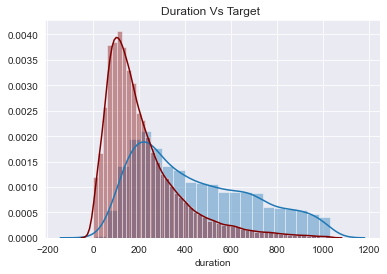

In [39]:
# Dist Plot for duration attribute and its impact on Target variable 

plt.title ('Duration Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['duration'])
sns.distplot( bankdata[bankdata['Target'] == 0]['duration'],color='Maroon')
plt.show()

Duration is one of the important feature

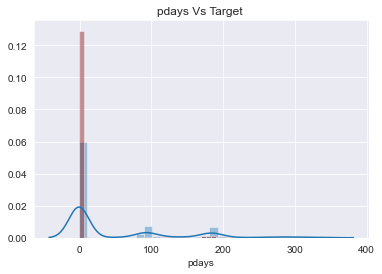

In [40]:
# Dist Plot for pdays attribute and its impact on Target variable 

plt.title ('pdays Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['pdays'])
sns.distplot( bankdata[bankdata['Target'] == 0]['pdays'],color='Maroon')
plt.show()

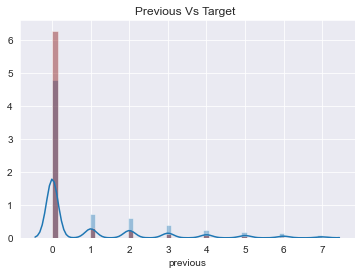

In [41]:
# Dist Plot for previous attribute and its impact on Target variable 

plt.title ('Previous Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['previous'])
sns.distplot( bankdata[bankdata['Target'] == 0]['previous'],color='Maroon')
plt.show()

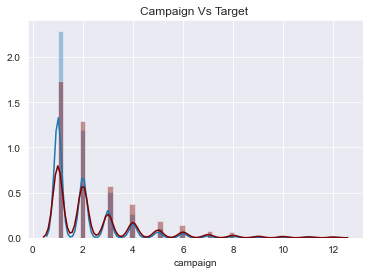

In [42]:
# Dist Plot for campaign attribute and its impact on Target variable 

plt.title ('Campaign Vs Target ')
sns.distplot( bankdata[bankdata['Target'] == 1]['campaign'])
sns.distplot( bankdata[bankdata['Target'] == 0]['campaign'],color='Maroon')
plt.show()

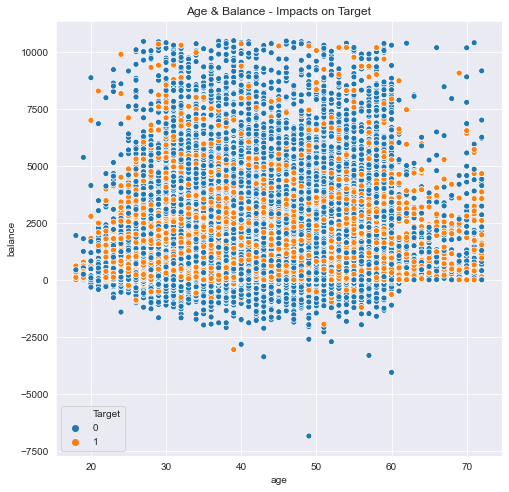

In [43]:
# Relationhip - age, balance and Target

plt.figure(figsize=(8,8))
sns.scatterplot(x='age',y='balance', data=bankdata, hue='Target')
plt.title("Age & Balance - Impacts on Target")
plt.show()

 Balance are more for customers of age group between 30-60, and above 60 held low balance, probably because they retired from work

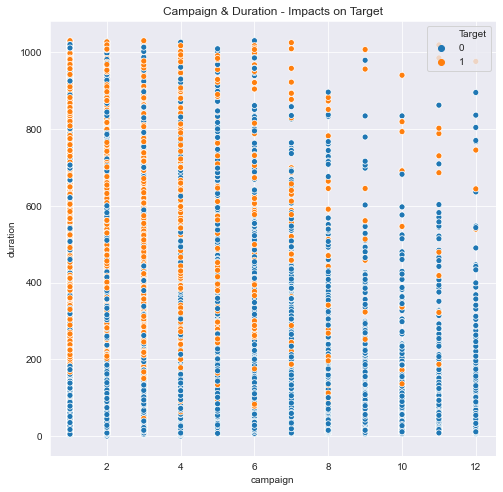

In [44]:
# Relationhip - campaign, duration and Target

plt.figure(figsize=(8,8))
sns.scatterplot(x='campaign',y='duration', data=bankdata, hue='Target')
plt.title("Campaign & Duration - Impacts on Target")
plt.show()

customers who subscribed to products were contacted less than 10 times, and almost call duration is less than 1000 seconds

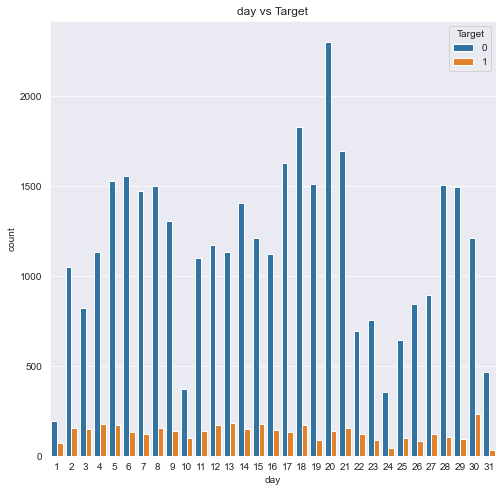

In [45]:
# day vs Target

plt.figure(figsize=(8,8))
sns.countplot(x='day', data=bankdata, hue='Target')
plt.title('day vs Target')
plt.show()

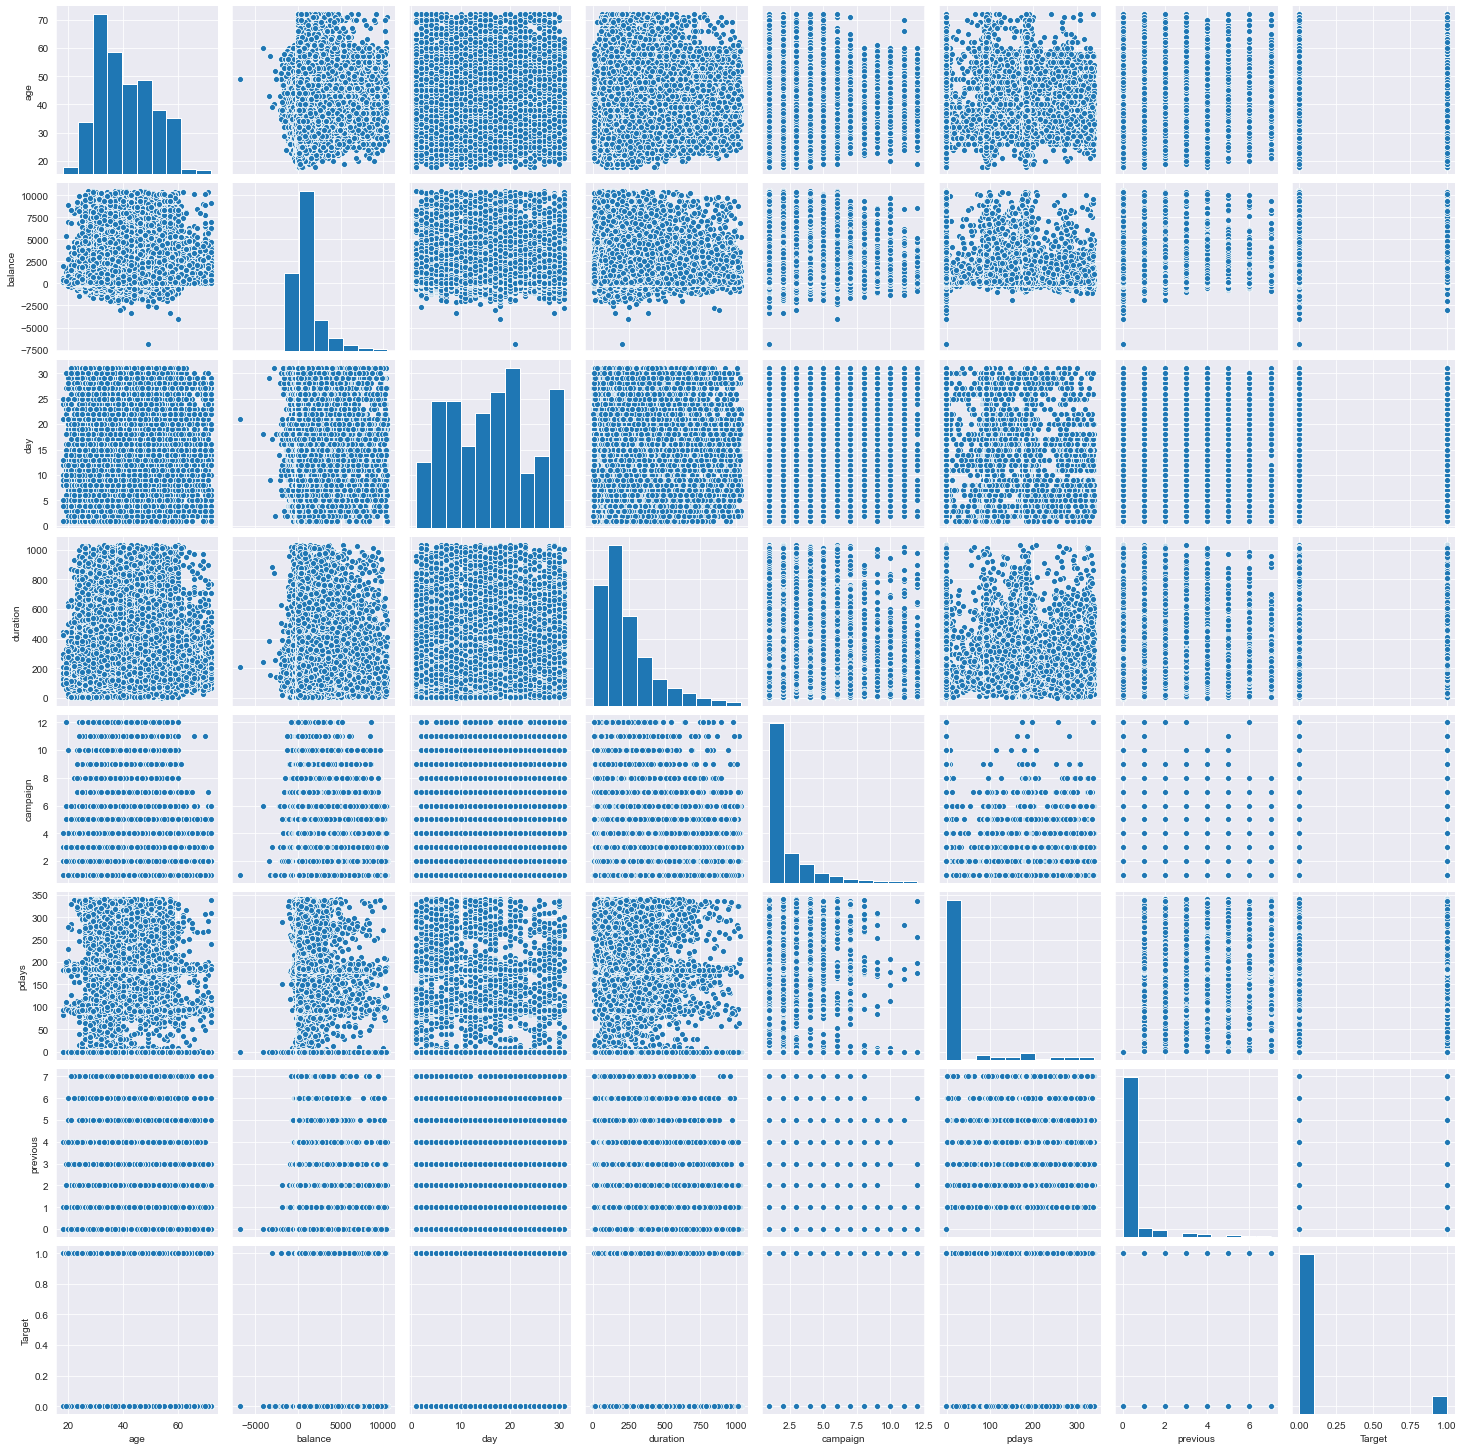

In [46]:
# Pair plot

sns.pairplot(data=bankdata)
plt.show()

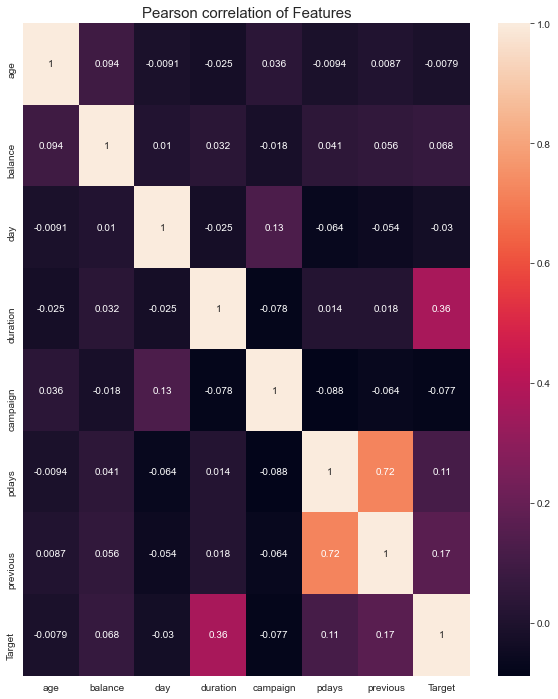

In [47]:
# Heatmap - correlation coefficients

corr = bankdata.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(corr, ax=ax, annot=True)
plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()

Observations:
    
1. There is no variable highly correlated to Target
2. pdays and previous are visibly correlated

In [48]:
# dropping the pdays column

bankdata.drop(['pdays'],axis=1, inplace=True)

##### changing categorical variable to numerical variable

In [49]:
bankdata[['housing','loan']]=bankdata[['housing','loan']].replace(["yes","no"],["1","0"])
bankdata['month']=bankdata['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])

In [50]:
# Updating the data type from category to int

bankdata['housing']=bankdata['housing'].astype('int')
bankdata['loan']=bankdata['loan'].astype('int')
bankdata['month']=bankdata['month'].astype('int')

In [51]:
# Converting the Job and Education column from category to int using label encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bankdata['job']=le.fit_transform(bankdata['job'])
bankdata['education']=le.fit_transform(bankdata['education'])

In [52]:
bankdata.head()

,age,job,education,balance,housing,loan,day,month,duration,campaign,previous,Target
0,58,4,2,2143,1,0,5,5,261,1,0,0
1,44,9,1,29,1,0,5,5,151,1,0,0
2,33,2,1,2,1,1,5,5,76,1,0,0
3,47,1,1,1506,1,0,5,5,92,1,0,0
5,35,4,2,231,1,0,5,5,139,1,0,0


In [53]:
# Creating new copy of existing dataframe

df=bankdata.copy()


In [54]:
# Separating independent and dependent variable

x=df.drop(['Target'],axis=1) #contain all  independent variable
y=df['Target']           #dependent variable
df['Target'].value_counts()

0    35924
1     4027
Name: Target, dtype: int64

The observation in one class is higher than the observation in other classes i.e., class imbalance exists. 
Resampling technique needs to be used here.otherwise we will get bad precision, f1-score, recall and ROC AUC curve
Lets try to build algorithm with and without over-sampling

In [55]:
# Model without over-sampling

# Dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(27965, 11) (11986, 11) (27965,) (11986,)


In [56]:
# % data in Training set and Test set

print("Model-1:Data split % in training set and test set")
print("")
print("{0:0.2f}% data is in training set".format((len(xtrain)/len(x.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(xtest)/len(x.index)) * 100))
print("")



Model-1:Data split % in training set and test set

70.00% data is in training set
30.00% data is in test set



In [57]:
# Logistic regression

# create model using constructor
LogRegModel = LogisticRegression()

# fit the model to training set
LogRegModel.fit(xtrain,ytrain)

# Train Model Score
Train_Model_Score =LogRegModel.score(xtrain, ytrain)
print("Logistic Regression - Training Model Score ")
print(Train_Model_Score)

y_pred = LogRegModel.predict(xtest) 

# get accuracy of model
lr_acc_score = accuracy_score(ytest,y_pred)

# get F1-score of model
lr_f1_score = f1_score(ytest,y_pred) 

# get the confusion matrix
lr_confmat = confusion_matrix(ytest,y_pred)

# get the classification report
lr_classrep = classification_report(ytest,y_pred)

lr_recall= recall_score(ytest,y_pred)
lr_precision= precision_score(ytest,y_pred)
roc_auc_score1=roc_auc_score(ytest, y_pred)

print("MODEL-1 PERFORMANCE MEASURES")
print()
print("Accuracy of model is {} %".format(lr_acc_score*100))
print()
print("Recall of model is %:",lr_recall*100)
print()
print("Precision of model is  %:",lr_precision*100)
print()
print("f1-score of model is {} ".format(lr_f1_score*100))
print()
print("roc_auc_score of Logistic Regression model-1 is {} %".format(roc_auc_score1*100))
print()
print("Confusion Matrix of Logistic Regression model is: \n",lr_confmat)
print()
print("Detailed classification report for Logistic Regression model is: \n",lr_classrep)

Logistic Regression - Training Model Score 
0.8998033255855533
MODEL-1 PERFORMANCE MEASURES

Accuracy of model is 89.74637076589354 %

Recall of model is %: 14.378029079159935

Precision of model is  %: 51.29682997118156

f1-score of model is 22.460567823343847 

roc_auc_score of Logistic Regression model-1 is 56.40282175952785 %

Confusion Matrix of Logistic Regression model is: 
 [[10579   169]
 [ 1060   178]]

Detailed classification report for Logistic Regression model is: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10748
           1       0.51      0.14      0.22      1238

    accuracy                           0.90     11986
   macro avg       0.71      0.56      0.58     11986
weighted avg       0.87      0.90      0.87     11986



Inference: Accuracy is 90% . however,  other performace measures(Precision, Recall and F1-Score and ROC AUC) are very less . This is due to class imbalance. This can be solved using upsampling technique called Random Over-sampling. Let's build models after oversampling the minority class and watch for results

In [58]:
# Random Over-Sampling

os =  RandomOverSampler()
x_new,y_new=os.fit_sample(x,y)

Original dataset shape Counter({0: 35924, 1: 4027})
Resampled dataset shape Counter({0: 35924, 1: 35924})


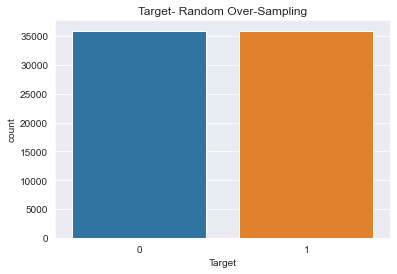

In [59]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)
plt.title('Target- Random Over-Sampling')
plt.show()

In [60]:
# Dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(50293, 11) (21555, 11) (50293,) (21555,)


In [61]:
# % data in Training set and Test set

print("Model-1:Data split % in training set and test set")
print("")
print("{0:0.2f}% data is in training set".format((len(xtrain)/len(x_new.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(xtest)/len(x_new.index)) * 100))
print("")



Model-1:Data split % in training set and test set

70.00% data is in training set
30.00% data is in test set



In [62]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71848 entries, 0 to 71847
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        71848 non-null  int64
 1   job        71848 non-null  int64
 2   education  71848 non-null  int64
 3   balance    71848 non-null  int64
 4   housing    71848 non-null  int64
 5   loan       71848 non-null  int64
 6   day        71848 non-null  int64
 7   month      71848 non-null  int64
 8   duration   71848 non-null  int64
 9   campaign   71848 non-null  int64
 10  previous   71848 non-null  int64
dtypes: int64(11)
memory usage: 6.0 MB


In [63]:
# Features scaling

scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [64]:
# Logistic regression

# create model using constructor
LogRegModel = LogisticRegression()

# fit the model to training set
LogRegModel.fit(xtrain,ytrain)

# Train Model Score
Train_Model_Score =LogRegModel.score(xtrain, ytrain)
print("Logistic Regression - Training Model Score ")
print(Train_Model_Score)

y_pred = LogRegModel.predict(xtest)


Logistic Regression - Training Model Score 
0.7885192770365658


In [65]:
# Logistic Regression- y_pred and Test model score

y_pred = LogRegModel.predict(xtest)

# Test Model Score
Test_Model_Score = LogRegModel.score(xtest, ytest)
print("Logistic Regression - Test Model score:")
print(Test_Model_Score)

Logistic Regression - Test Model score:
0.7921131987937834


In [66]:
# Logistic Regression - Performance Measures 

# get accuracy of model
lr_acc_score = accuracy_score(ytest,y_pred)

# get F1-score of model
lr_f1_score = f1_score(ytest,y_pred) 

# get the confusion matrix
lr_confmat = confusion_matrix(ytest,y_pred)

# get the classification report
lr_classrep = classification_report(ytest,y_pred)

lr_recall= recall_score(ytest,y_pred)
lr_precision= precision_score(ytest,y_pred)
roc_auc_score1=roc_auc_score(ytest, y_pred)

print("Logistic Regression PERFORMANCE MEASURES")
print()
print("Accuracy of model is {} %".format(lr_acc_score*100))
print()
print("Recall of model is %:",lr_recall*100)
print()
print("Precision of model is  %:",lr_precision*100)
print()
print("f1-score of model is {} ".format(lr_f1_score*100))
print()
print("roc_auc_score of Logistic Regression model-1 is {} %".format(roc_auc_score1*100))
print()
print("Confusion Matrix of Logistic Regression model is: \n",lr_confmat)
print()
print("Detailed classification report for Logistic Regression model is: \n",lr_classrep)

Logistic Regression PERFORMANCE MEASURES

Accuracy of model is 79.21131987937834 %

Recall of model is %: 78.02648759559784

Precision of model is  %: 79.74454294156897

f1-score of model is 78.876160844765 

roc_auc_score of Logistic Regression model-1 is 79.20524970567301 %

Confusion Matrix of Logistic Regression model is: 
 [[8708 2125]
 [2356 8366]]

Detailed classification report for Logistic Regression model is: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80     10833
           1       0.80      0.78      0.79     10722

    accuracy                           0.79     21555
   macro avg       0.79      0.79      0.79     21555
weighted avg       0.79      0.79      0.79     21555



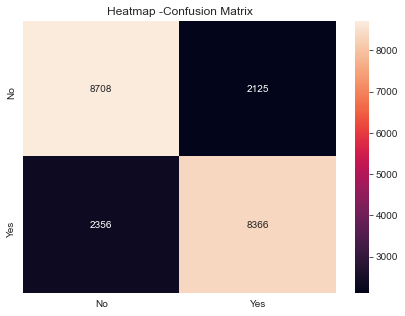

In [67]:
# Confusion Matrix-Heat Map

cm=metrics.confusion_matrix(ytest, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')
plt.title("Heatmap -Confusion Matrix")
plt.show()

In [68]:
# Decision Tree

DTree = DecisionTreeClassifier(criterion='entropy')

In [69]:

DTree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [70]:
print("Decision Train Score: %.2f" % DTree.score(xtrain, ytrain))  # performance on train data
print("Decision Test Score: %.2f" % DTree.score(xtest, ytest))  # performance on test data

Decision Train Score: 1.00
Decision Test Score: 0.96


In [71]:
# It is visible that model is overfit. applying pruning to fix the overfitting issue

In [72]:
# Applying Pruning - setting max depth of tree=4

clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
print("Pruned Decision Tree Train Score: %.2f" % clf_pruned.score(xtrain, ytrain))  # performance on train data
print("Pruned Decision Tree Test score: %.2f" % clf_pruned.score(xtest, ytest))  # performance on test data

Pruned Decision Tree Train Score: 0.79
Pruned Decision Tree Test score: 0.79


In [74]:
# important features

print(pd.DataFrame(clf_pruned.feature_importances_, columns = ["Imp"], index = x_new.columns))


                Imp
age        0.000000
job        0.000000
education  0.000000
balance    0.002717
housing    0.131911
loan       0.000000
day        0.000000
month      0.084717
duration   0.625775
campaign   0.000000
previous   0.154880



Pruned Decision Tree - Performance Measures 

Accuracy of model is 78.99327302250057 %

Recall of model is 86.46707703786606 %

Precision of model is 75.08098477486233 %

f1score of model is 80.37277850021674

ROC_AUC Score: 0.796606183785249

Detailed classification report is 
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     10833
           1       0.75      0.86      0.80     10722

    accuracy                           0.79     21555
   macro avg       0.80      0.79      0.79     21555
weighted avg       0.80      0.79      0.79     21555



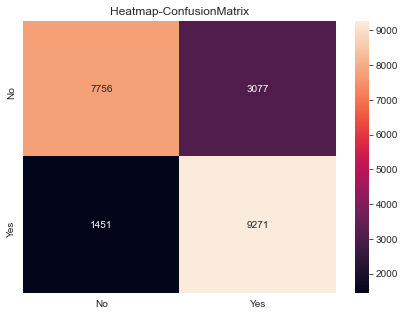

In [75]:
# Pruned Decision Tree - Performance Measures

y_predict = clf_pruned.predict(xtest)

print()
print("Pruned Decision Tree - Performance Measures ")
print()
Acc_DT=accuracy_score(ytest,y_predict)
print("Accuracy of model is {} %".format(Acc_DT*100))
Recall_DT=recall_score(ytest,y_predict)
print()
print("Recall of model is {} %".format(Recall_DT*100))
Precision_DT=precision_score(ytest,y_predict)
print()
print("Precision of model is {} %".format(Precision_DT*100))
f1score_DT=f1_score(ytest,y_predict)
print()
print("f1score of model is {}".format(f1score_DT*100))
AUC_LR=roc_auc_score(y_predict,ytest)
print()
print("ROC_AUC Score:",AUC_LR)
print()
print("Detailed classification report is \n" + classification_report(ytest,y_predict))
cm=metrics.confusion_matrix(ytest, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')
plt.title("Heatmap-ConfusionMatrix")
plt.show()

In [76]:
# Ensemble methods



Random Forest - Performance Measures

Accuracy of model is 96.82672233820459 %

Recall of model is 99.91606043648574 %

Precision of model is 94.072708113804 %

f1score of model is 96.90637720488468 %


ROC_AUC Score: 0.9699209321299525

Detailed classification report is 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10833
           1       0.94      1.00      0.97     10722

    accuracy                           0.97     21555
   macro avg       0.97      0.97      0.97     21555
weighted avg       0.97      0.97      0.97     21555

[[10158   675]
 [    9 10713]]


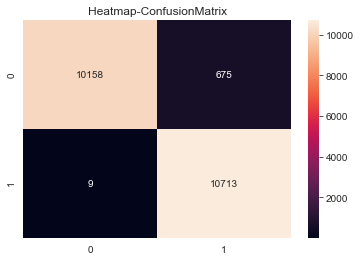

In [77]:
# Ensemble method - Random Forest

randomforest = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=8)
randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)

print()
print("Random Forest - Performance Measures")
print()
acc_rf=accuracy_score(ytest,y_pred)
print("Accuracy of model is {} %".format(acc_rf*100))
print()
recall_rf=recall_score(ytest,y_pred)
print("Recall of model is {} %".format(recall_rf*100))
print()
precision_rf=precision_score(ytest,y_pred)
print("Precision of model is {} %".format(precision_rf*100))
print()
f1score_rf=f1_score(ytest,y_pred)
print("f1score of model is {} %".format(f1score_rf*100))
print()
AUC_RF=roc_auc_score(y_pred,ytest)
print()
print("ROC_AUC Score:",AUC_RF)
print()
print("Detailed classification report is \n"+ classification_report(ytest,y_pred))
      
cm=confusion_matrix(ytest,y_pred)
print(cm)

sns.heatmap(cm,annot=True,fmt='d')
plt.title('Heatmap-ConfusionMatrix')
plt.show()

In [78]:
# Ensemble method - Bagging on Logistic regression

bgcl_lr = BaggingClassifier(base_estimator=LogRegModel, n_estimators=50,random_state=1)
bgcl_lr.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50,
                  random_state=1)


Performance Measures - Bagging on Logistic regression 

Accuracy of model is 79.18812340524241 %

Recall of model is 77.95187465025182 %

Precision of model is 79.75190839694658 %

f1score of model is 78.84161871521555 %


ROC_AUC Score: 0.7920326796822497

[[8711 2122]
 [2364 8358]]

Detailed classification report is 
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10833
           1       0.80      0.78      0.79     10722

    accuracy                           0.79     21555
   macro avg       0.79      0.79      0.79     21555
weighted avg       0.79      0.79      0.79     21555



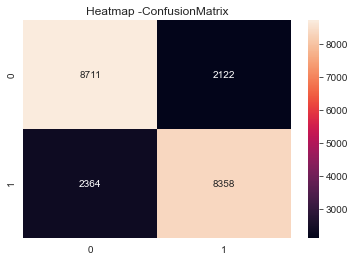

In [79]:
# Performance Measures - Bagging on Logistic regression
y_pred = bgcl_lr.predict(xtest)

print()
print("Performance Measures - Bagging on Logistic regression ")
print()
Bag_LR_acc=accuracy_score(ytest,y_pred)
print("Accuracy of model is {} %".format(Bag_LR_acc*100))
print()
Bag_LR_recall=recall_score(ytest,y_pred)
print("Recall of model is {} %".format(Bag_LR_recall*100))
print()
Bag_LR_precision=precision_score(ytest,y_pred)
print("Precision of model is {} %".format(Bag_LR_precision*100))
print()
Bag_LR_f1score=f1_score(ytest,y_pred)
print("f1score of model is {} %".format(Bag_LR_f1score*100))
print()
Bag_LR_AUC=roc_auc_score(y_pred,ytest)
print()
print("ROC_AUC Score:",Bag_LR_AUC)
print()
cm=confusion_matrix(ytest,y_pred)
print(cm)
print()
print("Detailed classification report is \n"+ classification_report(ytest,y_pred))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Heatmap -ConfusionMatrix')
plt.show()

In [80]:
# Ensemble method - Bagging on Decision Tree

bgcl_DT = BaggingClassifier(base_estimator=DTree, n_estimators=50,random_state=1)
bgcl_DT.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=50, random_state=1)


Performance Measure - Bagging on Decision Tree 

Accuracy of model is 96.46949663651125 %

Recall of model is 99.95336690915873 %

Precision of model is 93.41061622940818 %

f1score of model is 96.57129984230683 %


ROC_AUC Score: 0.9668051144737617

Detailed classification report is 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10833
           1       0.93      1.00      0.97     10722

    accuracy                           0.96     21555
   macro avg       0.97      0.96      0.96     21555
weighted avg       0.97      0.96      0.96     21555

[[10077   756]
 [    5 10717]]



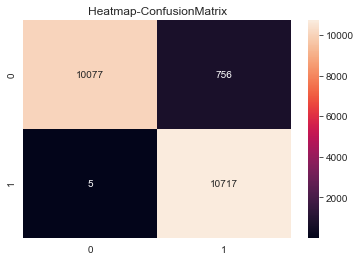

In [81]:
# Performance Measure - Bagging on Decision Tree

y_pred = bgcl_DT.predict(xtest)
print()
print("Performance Measure - Bagging on Decision Tree ")
Bag_DT_acc=accuracy_score(ytest,y_pred)
print()
print("Accuracy of model is {} %".format(Bag_DT_acc*100))
print()
Bag_DT_recall=recall_score(ytest,y_pred)
print("Recall of model is {} %".format(Bag_DT_recall*100))
print()
Bag_DT_precision=precision_score(ytest,y_pred)
print("Precision of model is {} %".format(Bag_DT_precision*100))
print()
Bag_DT_f1score=f1_score(ytest,y_pred)
print("f1score of model is {} %".format(Bag_DT_f1score*100))
print()
Bag_DT_AUC=roc_auc_score(y_pred,ytest)
print()
print("ROC_AUC Score:",Bag_DT_AUC)
print()
print("Detailed classification report is \n"+ classification_report(ytest,y_pred))
cm=confusion_matrix(ytest,y_pred)
print(cm)
print()
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Heatmap-ConfusionMatrix')
plt.show()

In [82]:
# Ensemble method - adaboosting on Logistic Regression

abcl_lr = AdaBoostClassifier(base_estimator=LogRegModel, n_estimators=50, random_state=1)
abcl_lr.fit(xtrain, ytrain)

AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=1)


Performance Measures - adaboosting on Logistic Regression 

Accuracy of model is 78.93296218974716 %

Recall of model is 76.21712367095691 %

Precision of model is 80.40932795434419 %

f1score of model is 78.25712233660524 %


ROC_AUC Score: 0.7901259937043053

Detailed classification report is 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     10833
           1       0.80      0.76      0.78     10722

    accuracy                           0.79     21555
   macro avg       0.79      0.79      0.79     21555
weighted avg       0.79      0.79      0.79     21555

[[8842 1991]
 [2550 8172]]



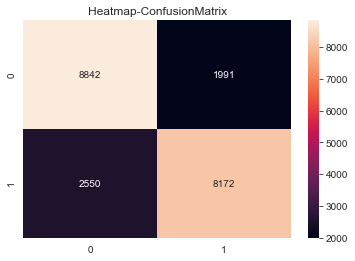

In [83]:
# Performance Measures - adaboosting on Logistic Regression

y_pred = abcl_lr.predict(xtest)

print()
print("Performance Measures - adaboosting on Logistic Regression ")
print()
abcl_lr_acc=accuracy_score(ytest,y_pred)
print("Accuracy of model is {} %".format(abcl_lr_acc*100))
print()
abcl_lr_recall=recall_score(ytest,y_pred)
print("Recall of model is {} %".format(abcl_lr_recall*100))
print()
abcl_lr_precision=precision_score(ytest,y_pred)
print("Precision of model is {} %".format(abcl_lr_precision*100))
print()
abcl_lr_f1score=f1_score(ytest,y_pred)
print("f1score of model is {} %".format(abcl_lr_f1score*100))
print()
abcl_lr_AUC=roc_auc_score(y_pred,ytest)
print()
print("ROC_AUC Score:",abcl_lr_AUC)
print()
print("Detailed classification report is \n"+ classification_report(ytest,y_pred))
cm=confusion_matrix(ytest,y_pred)
print(cm)
print()
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Heatmap-ConfusionMatrix')
plt.show()

In [84]:
# Ensemble method - adaboosting on Decision Tree

abcl_DT = AdaBoostClassifier(base_estimator=DTree, n_estimators=50, random_state=1)
abcl_DT.fit(xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   random_state=1)


Performance Measures - adaboosting on Decision Tree

Accuracy of model is 96.20041753653445 %

Recall of model is 99.91606043648574 %

Precision of model is 92.97058057797449 %

f1score of model is 96.31827376938638 %


ROC_AUC Score: 0.9644043382965709

Detailed classification report  is 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10833
           1       0.93      1.00      0.96     10722

    accuracy                           0.96     21555
   macro avg       0.96      0.96      0.96     21555
weighted avg       0.96      0.96      0.96     21555

[[10023   810]
 [    9 10713]]



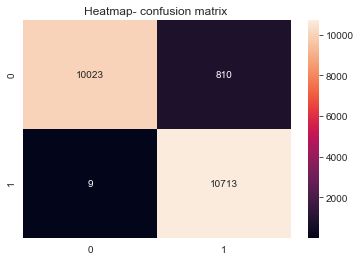

In [85]:
# Performance Measures - adaboosting on Decision Tree

y_pred = abcl_DT.predict(xtest)

print()
print("Performance Measures - adaboosting on Decision Tree")
print()
abcl_DT_acc=accuracy_score(ytest,y_pred)
print("Accuracy of model is {} %".format(abcl_DT_acc*100))
print()
abcl_DT_recall=recall_score(ytest,y_pred)
print("Recall of model is {} %".format(abcl_DT_recall*100))
print()
abcl_DT_precision=precision_score(ytest,y_pred)
print("Precision of model is {} %".format(abcl_DT_precision*100))
print()
abcl_DT_f1score=f1_score(ytest,y_pred)
print("f1score of model is {} %".format(abcl_DT_f1score*100))
print()
abcl_DT_AUC=roc_auc_score(y_pred,ytest)
print()
print("ROC_AUC Score:",abcl_DT_AUC)
print()
print("Detailed classification report  is \n"+ classification_report(ytest,y_pred))
cm=confusion_matrix(ytest,y_pred)
print(cm)
print()
plt.title("Heatmap- confusion matrix ")
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [86]:
#  Ensemble method - Gradient Boosting

gbcl_lr = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_lr.fit(xtrain, ytrain)


GradientBoostingClassifier(n_estimators=50, random_state=1)


Performance Measures - Gradient Boosting

Accuracy of model is 83.35421016005567 %

Recall of model is 85.43182242119008 %

Precision of model is 81.88807437868765 %

f1score of model is 83.62242103341244 %


ROC_AUC Score: 0.8341197045195353

Detailed classification report is 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     10833
           1       0.82      0.85      0.84     10722

    accuracy                           0.83     21555
   macro avg       0.83      0.83      0.83     21555
weighted avg       0.83      0.83      0.83     21555

[[8807 2026]
 [1562 9160]]



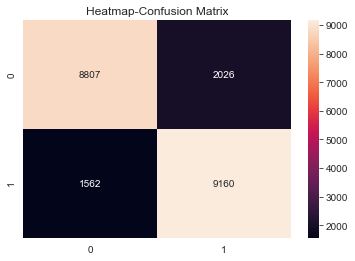

In [87]:
# Performance Measures - Gradient Boosting
y_pred = gbcl_lr.predict(xtest)

print()
print("Performance Measures - Gradient Boosting")
print()
gbcl_lr_acc=accuracy_score(ytest,y_pred)
print("Accuracy of model is {} %".format(gbcl_lr_acc*100))
print()
gbcl_lr_recall=recall_score(ytest,y_pred)
print("Recall of model is {} %".format(gbcl_lr_recall*100))
print()
gbcl_lr_precision=precision_score(ytest,y_pred)
print("Precision of model is {} %".format(gbcl_lr_precision*100))
print()
gbcl_lr_f1score=f1_score(ytest,y_pred)
print("f1score of model is {} %".format(gbcl_lr_f1score*100))
print()
gbcl_lr_AUC=roc_auc_score(y_pred,ytest)
print()
print("ROC_AUC Score:",gbcl_lr_AUC)
print()
print("Detailed classification report is \n"+ classification_report(ytest,y_pred))
cm=confusion_matrix(ytest,y_pred)
print(cm)
print()
plt.title('Heatmap-Confusion Matrix')
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [88]:
# Displaying performance measures of all models in single dataframe

ind=['Logistic regression','DecisionTree','RandomForest','LogisticRegression_Bagging','DecisionTree_Bagging','LogisticRegression_AdaBossting','DecisionTree_AdaBoosting','GradientBoosting']


data={"Accuracy":[lr_acc_score,Acc_DT,acc_rf,Bag_LR_acc,Bag_DT_acc,abcl_lr_acc,abcl_DT_acc,gbcl_lr_acc],
    "Recall":[lr_recall,Recall_DT,recall_rf,Bag_LR_recall,Bag_DT_recall,abcl_lr_recall,abcl_DT_recall,gbcl_lr_recall],
"Precision":[lr_precision,Precision_DT,precision_rf,Bag_LR_precision,Bag_DT_precision,abcl_lr_precision,abcl_DT_precision,gbcl_lr_precision],
    "f1-score":[lr_f1_score,f1score_DT,f1score_rf,Bag_LR_f1score,Bag_DT_f1score,abcl_lr_f1score,abcl_DT_f1score,gbcl_lr_f1score],
"ROC_AUC":[roc_auc_score1,AUC_LR,AUC_RF,Bag_LR_AUC,Bag_DT_AUC,abcl_lr_AUC,abcl_DT_AUC,gbcl_lr_AUC]}

# sorting the best model from top to bottom in a dataframe

result=pd.DataFrame(data=data,index=ind).sort_values(by='f1-score',ascending=False)
(result*100).round(0)



,Accuracy,Recall,Precision,f1-score,ROC_AUC
RandomForest,97.0,100.0,94.0,97.0,97.0
DecisionTree_Bagging,96.0,100.0,93.0,97.0,97.0
DecisionTree_AdaBoosting,96.0,100.0,93.0,96.0,96.0
GradientBoosting,83.0,85.0,82.0,84.0,83.0
DecisionTree,79.0,86.0,75.0,80.0,80.0
Logistic regression,79.0,78.0,80.0,79.0,79.0
LogisticRegression_Bagging,79.0,78.0,80.0,79.0,79.0
LogisticRegression_AdaBossting,79.0,76.0,80.0,78.0,79.0


From above 8 model, Random forest is the best model with highest accuracy, precision, f1-score,recall and ROC_AUC
